In [1]:
%load_ext autoreload
%autoreload 2

## load the dataset

In [108]:
import pandas as pd

# custom reader needed to handle quotechars
def read_df_custom(file):
    header = 'doc     unit1_toks      unit2_toks      unit1_txt       unit2_txt       s1_toks s2_toks unit1_sent      unit2_sent      dir     nuc_children    sat_children    genre   u1_discontinuous        u2_discontinuous       u1_issent        u2_issent       u1_length       u2_length       length_ratio    u1_speaker      u2_speaker      same_speaker    u1_func u1_pos  u1_depdir       u2_func u2_pos  u2_depdir       doclen  u1_position      u2_position     percent_distance        distance        lex_overlap_words       lex_overlap_length      unit1_case      unit2_case      label'
    extracted_columns = ['doc', 'unit1_txt', 'unit1_sent', 'unit2_txt', 'unit2_sent', 'dir', 'label', 'distance', 'u1_depdir', 'u2_depdir', 'u2_func', 'u1_position', 'u2_position', 'sat_children', 'nuc_children', 'genre', 'unit1_case', 'unit2_case',
                            'u1_discontinuous', 'u2_discontinuous', 'same_speaker', 'lex_overlap_length', 'u1_func']
    header = header.split()
    df = pd.DataFrame(columns=extracted_columns)
    file = open(file, 'r')

    rows = []
    count = 0 
    for line in file:
        line = line[:-1].split('\t')
        count+=1
        if count ==1: continue
        row = {}
        for column in extracted_columns:
            index = header.index(column)
            row[column] = line[index]
        rows.append(row)

    df = pd.concat([df, pd.DataFrame.from_records(rows)])
    return df

train_df = read_df_custom('../../processed/spa.rst.sctb_train_enriched.rels')
test_df = read_df_custom('../../processed/spa.rst.sctb_test_enriched.rels')
val_df = read_df_custom('../../processed/spa.rst.sctb_dev_enriched.rels')

Text(0, 0.5, 'Counts')

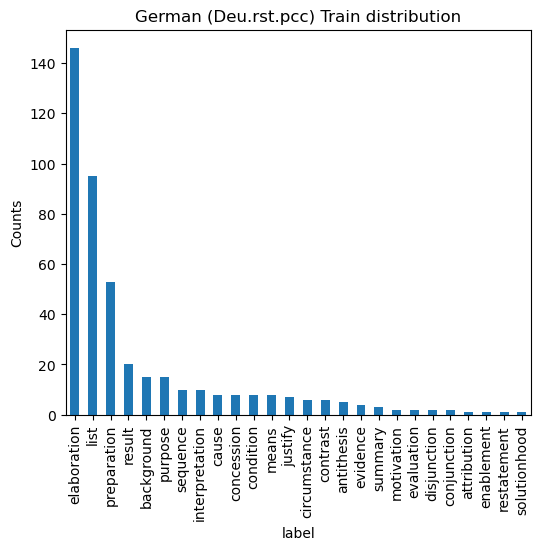

In [73]:
import matplotlib as plt

count_df = pd.DataFrame(train_df.groupby('label').count()['dir'])
count_df.columns = ['count']
total = count_df.sum()[0]
count_df['percentage'] = count_df['count'].astype(float)*100.0/total
count_df.sort_values(by='percentage', ascending=False, inplace=True)

ax = count_df['count'].plot.bar(title='German (Deu.rst.pcc) Train distribution', figsize=(6, 5))
ax.set_ylabel('Counts')

In [74]:
count_df

,count,percentage
label,,
elaboration,146,33.257403
list,95,21.640091
preparation,53,12.072893
result,20,4.555809
background,15,3.416856
purpose,15,3.416856
sequence,10,2.277904
interpretation,10,2.277904
cause,8,1.822323


### Chance probs

In [75]:
majority_label = max(count_df['count'])
majority_prob = majority_label/total
majority_prob*100

33.25740318906606

In [103]:
genre_set = set()
mapping = {'academic': 'academic',
            'bio': 'political',
            'conversation': 'chats',
            'fiction': 'academic',
            'interview': 'chats',
            'news': 'news',
            'reddit': 'chats',
            'speech': 'political',
            'textbook': 'academic',
            'vlog': 'chats',
            'voyage': 'academic',
            'whow': 'science'}


# train_df['genre'] = train_df['doc'].apply(lambda doc_id : mapping[doc_id[:2]])

for i in set(train_df['doc']):
    genre_set.add(i.split('_')[1])
genre_set

{'academic',
 'bio',
 'conversation',
 'fiction',
 'interview',
 'news',
 'reddit',
 'speech',
 'textbook',
 'vlog',
 'voyage',
 'whow'}

In [134]:
train_df[train_df['doc'].str.contains('EEP', na = False)]['unit1_sent'][79]

'Se acordó establecer una hoja de ruta para identificar áreas estratégicas de interés mutuo y avanzar en proyectos concretos hasta la próxima Comisión mixta que se celebrará en 2017 en España .'

In [85]:
mapping = {
    'BMCS': 'academic',#miguel cervantes library
    'CCICE': 'news',#Chamber of Commerce and Investment of China in Spain
    'EEP': 'political',#Spain Embassy in Beijing, 
    'FICB': 'news',#foundation in barcelona
    'ICEG': 'academic',#Granada Confucius Insti
    'ICP': 'academic',#Spain-China Council Foundation/Beijing Cervantes Institute 
    'TERM': 'science',#terminology #conference terminology
    }
train_df['genre'] = train_df['doc'].apply(lambda genre: genre.split('_')[0])
train_df['genre'] = train_df['genre'].apply(lambda doc_id : mapping[''.join([i for i in doc_id if not i.isdigit()])])

In [135]:
lang = 'spa.rst.sctb'

if lang=='rus': 
    train_df['genre'] = train_df['doc'].apply(lambda doc_id : doc_id.split('_')[0])
    train_df['genre'] = train_df['genre'].apply(lambda genre: genre.split('.')[0])
    train_df['genre'] = train_df['genre'].apply(lambda genre: genre.replace('2','').replace('1',''))
elif lang=='spa.rst.rststb':
    mapping = {
    'as': 'science',#astrophysics
    'de': 'science',
    'ec': 'economics',
    'in': 'economics',
    'li': 'linguistics',
    'ma': 'science',#maths
    'me': 'science',#medicine
    'ps': 'science',#psychology
    'se': 'science',#sexuality science
    'as': 'science',#astrophysics
    }
    train_df['genre'] = train_df['doc'].apply(lambda doc_id : mapping[doc_id[:2]])
elif lang=='nld':
    mapping = {
    'AD': 'commercial',#advertisements
    'FL': 'commercial',#fundraising letter
    'PS': 'science',
    'EE': 'science',#encyclopedia
    }
    train_df['genre'] = train_df['doc'].apply(lambda doc_id : mapping[doc_id[:2]])
elif lang=='spa.rst.sctb' or lang=='zho.rst.sctb':
    mapping = {
    'BMCS': 'academic',#miguel cervantes library
    'CCICE': 'news',#Chamber of Commerce and Investment of China in Spain
    'EEP': 'political',#Spain Embassy in Beijing, 
    'FICB': 'news',#foundation in barcelona
    'ICEG': 'academic',#Granada Confucius Insti
    'ICP': 'academic',#Spain-China Council Foundation/Beijing Cervantes Institute 
    'TERM': 'science',#terminology #conference terminology
    }
    train_df['genre'] = train_df['doc'].apply(lambda doc_id: doc_id.split('_')[0])
    train_df['genre'] = train_df['genre'].apply(lambda genre : mapping[''.join([i for i in genre if not i.isdigit()])])
elif lang=='fra.sdrt.annodis':
    mapping = {
    'geop': 'political',
    'wik1': 'academic',
    'news': 'news',
    'wik2': 'academic',
    }
    train_df['genre'] = train_df['doc'].apply(lambda doc: mapping[doc.split('_')[0]])
elif lang=='eng.rst.gum':
    mapping = {'academic': 'academic',
                'bio': 'political',
                'conversation': 'chats',
                'fiction': 'fiction',
                'interview': 'chats',
                'news': 'news',
                'reddit': 'chats',
                'speech': 'political',
                'textbook': 'academic',
                'vlog': 'chats',
                'voyage': 'academic',
                'whow': 'science'}
    train_df['genre'] = train_df['doc'].apply(lambda doc: mapping[doc.split('_')[1]])
else: pass

count_genre_df = pd.DataFrame(train_df.groupby('genre').count()['dir'])
count_genre_df.columns = ['count']
total_genre = count_genre_df.sum()[0]
count_genre_df['percentage'] = count_genre_df['count'].astype(float)*100.0/total_genre
count_genre_df.sort_values(by='percentage', ascending=False, inplace=True)

count_genre_df

,count,percentage
genre,,
science,242,55.125285
academic,119,27.107062
news,41,9.339408
political,37,8.428246
